**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2021</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 02, 2022 17:00 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "hakansivuk@gmail.com".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) Why do people use validation data?<br>

  >b) What is the difference between mean squared error and mean absolute error?  <br>

  >c) What is the main problem of using sigmoid as activation function in an artificial neural network (ANN)?<br>

>d) What does it mean to overfit your data model?<br>

  >e) Your input image size is 3x64x64. If you apply 3x3 convolution with input_channel=3, output_channel=6, padding=0, stride=2, what would be the size of the output?<br>

  >f) In the previous question, how many trainable parameters are there? (you should also consider bias terms in addition to weights)<br>





a- Validation data is used to measure training performance which also measures the overfit-underfit rates. Since model is trained on train data, measuring performance on train do not show overfit performance. <br>
b- Mean squared error is calculated by taking 2nd power of all errors summing them and taking their square root and dividing into data number while mean absolute error is calculated by taking the absolute of errors summing them and dividing into data number. <br>
c- If we use sigmoid as activation of ANN, vanishing gradient problem may occur. Which states that the derivative of the sigmoid is going zero with increasing z. <br>
d- Overfitting is memorizing the training datas while setting the model parameters. If the model memorizes the train datas, it will give very high accuracies on train set while giving worse results on test and validation sets. <br>
e- 6 x 31 x 31 <br>
f- The formula is 31 x 31 + 1 (w0) = 962 parameters. Since there are 6 channels, 962 x 6 = 5772. <br>

##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify scenes according to their contexts by using simple machine learning algorithms developed for CV problems on scene images.

Your dataset consist of scene images from 4 contexts. Images of each context is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 2500 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1l51t3aTY7B131fwq92ACI_b_D5Idq5In/view?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import os
import gc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Loader [6 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "SceneDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of SceneDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [5]:
# !cp /content/drive/MyDrive/Datasets/data.zip .
# !unzip data.zip -d .

In [6]:
class SceneDataset(Dataset):
    # TODO:
    # Define constructor for SceneDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data_adr, data_ids, labels, data_extension):
        self.data_ids = data_ids
        self.labels = labels
        self.data_adr = data_adr
        self.data_ext = data_extension
        self.dct = {'forest' : 0,
                    'glacier' : 1,
                    'mountain' : 2,
                    'sea' : 3}

    '''This function should return sample count in the dataset'''
    def __len__(self):
       return self.data_ids.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        data_id = self.data_ids[index]
        X = np.moveaxis(np.asarray(Image.open(self.data_adr + '/' + self.labels[index] + '/' + data_id + '.' + self.data_ext), dtype = float), -1, 0)
        X = (X/255.0).astype(np.float32)
        
        y = self.dct[self.labels[index]]
        return X, y

In [7]:
def get_dataset(root):
    # TODO: 
    # Read dataset files
    # loader = DataLoader(root, batch_size=len(root))
    # data, labels = next(iter(loader))
    labels = root.labels


    y = np.zeros(len(root))
    y = torch.Tensor(y)
    
    # Construct training, validation and test sets
    X_train, X_test, y_train, y_test = train_test_split(root, y, test_size = 0.3, random_state = 31)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 1/3, random_state = 31)
    # Normalize datasets
    # X_train = F.normalize(X_train, dim = 1)
    # X_test = F.normalize(X_test, dim = 1)
    # X_val = F.normalize(X_val, dim = 1)
    # X_train = X_train.permute(0, 3, 2, 1)
    # X_test = X_test.permute(0, 3, 2, 1)
    # X_val = X_val.permute(0, 3, 2, 1)

    return (X_train, y_train, X_val, y_val, X_test, y_test)

In [9]:
X = []
y = []
for folder in os.listdir('/content/data/'):
    for file_name in os.listdir(f'/content/data/{folder}'):
        X.append(file_name[:-4])
        y.append(folder)
X = np.array(X)
y = np.array(y)
dataset = SceneDataset('/content/data', X, y, 'jpg')
X_train, y_train, X_val, y_val, X_test, y_test = get_dataset(dataset)
del X
del y
gc.collect()

246

###Model Implementation [7 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 4 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU </li>
    <li>(3) 8 filters with size of 3 x 3 with stride 1 and padding 1, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 16 filters with size of 3 x 3 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [35]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self): # you can add any additional parameters you want 
        # TODO:
        # You should create your neural network here
        super(ConvNet, self).__init__()
        self.hoca = nn.Sequential(
        nn.Conv2d(3, 4, kernel_size = 3, stride = 1, padding = 1),    #1
        nn.ReLU(),                                                    #2
        nn.Conv2d(4, 8, kernel_size = 3, stride = 1, padding = 1),    #3
        nn.ReLU(),                                                    #4
        nn.MaxPool2d(kernel_size = 2),                                #5
        nn.Conv2d(8, 16, kernel_size = 3, stride = 1, padding = 1),   #6
        nn.ReLU(),                                                    #7
        nn.MaxPool2d(kernel_size = 2),
        nn.Flatten(),
        nn.LazyLinear(4),
        nn.LogSoftmax()
        )

    def forward(self, X): # you can add any additional parameters you want
        # TODO:
        # Forward propagation implementation should be here
        return self.hoca(X)

from torchsummary import summary
x = ConvNet()
summary(x.hoca, (3, 90, 90), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 90, 90]             112
              ReLU-2            [-1, 4, 90, 90]               0
            Conv2d-3            [-1, 8, 90, 90]             296
              ReLU-4            [-1, 8, 90, 90]               0
         MaxPool2d-5            [-1, 8, 45, 45]               0
            Conv2d-6           [-1, 16, 45, 45]           1,168
              ReLU-7           [-1, 16, 45, 45]               0
         MaxPool2d-8           [-1, 16, 22, 22]               0
           Flatten-9                 [-1, 7744]               0
           Linear-10                    [-1, 4]          30,980
       LogSoftmax-11                    [-1, 4]               0
Total params: 32,556
Trainable params: 32,556
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.09
Forward/ba

###Stochastic Gradient Descent [25 pts.]

####Training with SGD [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [36]:
import warnings
warnings.filterwarnings("ignore")
gc.collect()

88

In [63]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 100
train_batch = 1750
test_batch = 250
learning_rate = 1e-2# try learning rate from the interval [1e-1, 1e-4]

use_gpu = torch.cuda.is_available()

# Create train dataset loader
trainloader = DataLoader(X_train, train_batch)
testloader = DataLoader(X_val, test_batch)
# Create validation dataset loader
# Create test dataset loader
# initialize your network
model = ConvNet()

# define your loss function
loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
gc.collect()
train_acc = np.zeros(max_epoch)
val_acc = np.zeros(max_epoch)
for epoch in range(max_epoch):
    print(epoch)
    preds = np.zeros((7000, 4))
    ys = np.zeros(7000)
    q = 0
    losses = 0
    model = model.train()
    for (x, y) in trainloader:
        pred = model(x.float())
        y = y.type(torch.LongTensor)
        ys[train_batch*q:train_batch*(q+1)] = y.detach().numpy()
        loss = loss_fn(pred, y)
        preds[train_batch*q:train_batch*(q+1)] = pred.detach().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        q += 1
        losses += loss
        
    model = model.eval()
    with torch.no_grad():
        preds2 = np.zeros((1000, 4))
        y_vals = np.zeros(1000)
        q = 0
        for (x, y) in testloader:
            pred = model(x.float())
            y = y.type(torch.LongTensor)
            loss = loss_fn(pred, y)
            y_vals[test_batch*q:test_batch*(q+1)] = y.detach().numpy()
            preds2[test_batch*q:test_batch*(q+1)] = pred.detach().numpy()
            q += 1

        y1 = np.argmax(preds, axis = 1)
        y2 = np.argmax(preds2, axis = 1)
        train_acc[epoch] = 100*accuracy_score(y1, ys)
        val_acc[epoch] = 100*accuracy_score(y2, y_vals)
        print("%.2f"%train_acc[epoch])
        print("%.2f"%val_acc[epoch])
        print(losses/4)
    if epoch > 0 and max(val_acc[:epoch]) < val_acc[epoch]:
        torch.save(model, 'drive/MyDrive/model.pth')


0
24.87
27.60
tensor(2.7739)
1
24.87
27.60
tensor(2.7729)
2
24.87
28.10
tensor(2.7722)
3
26.33
27.90
tensor(2.7718)
4
28.77
28.30
tensor(2.7715)
5
29.93
32.50
tensor(2.7713)
6
32.81
34.00
tensor(2.7710)
7
35.24
35.20
tensor(2.7708)
8
37.30
35.80
tensor(2.7706)
9
38.37
37.00
tensor(2.7704)
10
39.47
37.30
tensor(2.7701)
11
40.20
37.60
tensor(2.7698)
12
40.87
37.90
tensor(2.7696)
13
41.39
38.30
tensor(2.7692)
14
41.86
38.60
tensor(2.7689)
15
42.27
39.20
tensor(2.7685)
16
42.57
39.60
tensor(2.7680)
17
42.87
40.10
tensor(2.7675)
18
43.03
40.50
tensor(2.7670)
19
43.21
40.90
tensor(2.7664)
20
43.53
40.80
tensor(2.7657)
21
43.67
41.20
tensor(2.7650)
22
43.79
41.40
tensor(2.7641)
23
44.01
41.10
tensor(2.7632)
24
44.11
41.00
tensor(2.7622)
25
44.19
40.90
tensor(2.7610)
26
44.33
41.20
tensor(2.7597)
27
44.41
41.30
tensor(2.7583)
28
44.76
41.60
tensor(2.7566)
29
45.20
41.60
tensor(2.7547)
30
45.64
41.80
tensor(2.7526)
31
46.11
42.70
tensor(2.7501)
32
46.67
43.20
tensor(2.7472)
33
47.57
43.50
tenso

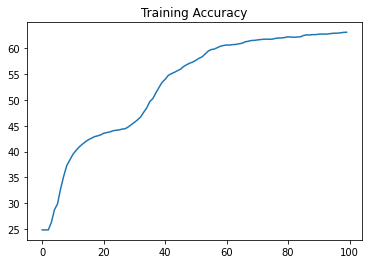

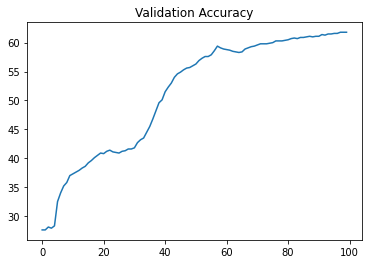

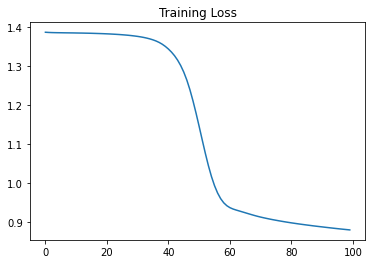

In [70]:
losses = np.array([2.7739,2.7729,2.7722,2.7718,2.7715,2.7713,2.7710,2.7708,2.7706,2.7704,2.7701,2.7698,2.7696,2.7692,2.7689,2.7685,2.7680,2.7675,2.7670,2.7664,2.7657,2.7650,2.7641,2.7632,2.7622,2.7610,2.7597,2.7583,2.7566,2.7547,2.7526,2.7501,2.7472,2.7437,2.7397,2.7348,2.7289,2.7216,2.7125,2.7013,2.6879,2.6722,2.6535,2.6308,2.6032,2.5695,2.5285,2.4792,2.4220,2.3588,2.2914,2.2221,2.1541,2.0906,2.0345,1.9875,1.9497,1.9207,1.8994,1.8846,1.8746,1.8677,1.8625,1.8578,1.8531,1.8484,1.8436,1.8389,1.8344,1.8301,1.8262,1.8226,1.8192,1.8159,1.8128,1.8099,1.8070,1.8043,1.8016,1.7991,1.7966,1.7943,1.7920,1.7898,1.7877,1.7856,1.7836,1.7815,1.7796,1.7777,1.7759,1.7740,1.7722,1.7704,1.7686,1.7669,1.7652,1.7636,1.7620,1.7604])
losses /= 2 
plt.plot(np.arange(0, 100, 1, dtype = int) ,train_acc)
plt.title('Training Accuracy')
plt.show()
print()
plt.plot(np.arange(0, 100, 1, dtype = int) ,val_acc)
plt.title('Validation Accuracy')
plt.show()
print()
plt.plot(np.arange(0, 100, 1, dtype = int) ,losses)
plt.title('Training Loss')
plt.show()
print()

####Test with SGD [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Mean Loss: 1.142809 
Mean Acc: 0.634 
Mean Macro Precision: 0.6202948282467023 
Mean Macro Recall: 0.633710139371838 
Mean Macro F1 Score: 0.6205140285355134


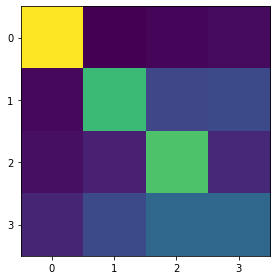

In [78]:
# Test CNN
# load best model
best_path = "drive/MyDrive/model.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
testtbatch = 500
testtloader = DataLoader(X_test, testtbatch)

preds3 = np.zeros((2000, 4))
y_tests = np.zeros(2000)

with torch.no_grad():
#   iterate over test batches
    q = 0
    for (x, y) in testtloader:
            pred = model(x.float())
            y = y.type(torch.LongTensor)
            y_tests[testtbatch*q:testtbatch*(q+1)] = y.detach().numpy()
            preds3[testtbatch*q:testtbatch*(q+1)] = pred.detach().numpy()
            q += 1

#   get confusion matrix
preds3 = np.argmax(preds3, axis = 1)
conf = confusion_matrix(y_tests, preds3)
#   calculate accuracy
acc = accuracy_score(y_tests, preds3)
#   calculate precision
pre = precision_score(y_tests, preds3, average = 'macro')
#   calculate recall
rec = recall_score(y_tests, preds3, average = 'macro')
#   calculate F1 score
f1 = f1_score(y_tests, preds3, average = 'macro')

# print metrics
print("Mean Loss:", np.mean(losses), "\nMean Acc:", acc, "\nMean Macro Precision:", pre, "\nMean Macro Recall:", rec, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

###Adam Optimizer [25 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [80]:
max_epoch = 100
train_batch = 1750
test_batch = 250
learning_rate = 1e-2# try learning rate from the interval [1e-1, 1e-4]

use_gpu = torch.cuda.is_available()

# Create train dataset loader
trainloader = DataLoader(X_train, train_batch)
testloader = DataLoader(X_val, test_batch)
# Create validation dataset loader
# Create test dataset loader
# initialize your network
model = ConvNet()

# define your loss function
loss_fn = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well

# start training
# for each epoch calculate validation performance
# save best model according to validation performance
gc.collect()
train_acc_adam = np.zeros(max_epoch)
val_acc_adam = np.zeros(max_epoch)
loss_arr_train = []
loss_arr_val = []
for epoch in range(max_epoch):
    print(epoch)
    preds = np.zeros((7000, 4))
    ys = np.zeros(7000)
    q = 0
    losses = 0
    losses2 = 0
    model = model.train()
    for (x, y) in trainloader:
        pred = model(x.float())
        y = y.type(torch.LongTensor)
        ys[train_batch*q:train_batch*(q+1)] = y.detach().numpy()
        loss = loss_fn(pred, y)
        preds[train_batch*q:train_batch*(q+1)] = pred.detach().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        q += 1
        losses += loss
    loss_arr_train.append(losses)
        
    model = model.eval()
    with torch.no_grad():
        preds2 = np.zeros((1000, 4))
        y_vals = np.zeros(1000)
        q = 0
        for (x, y) in testloader:
            pred = model(x.float())
            y = y.type(torch.LongTensor)
            loss = loss_fn(pred, y)
            losses2 += loss
            y_vals[test_batch*q:test_batch*(q+1)] = y.detach().numpy()
            preds2[test_batch*q:test_batch*(q+1)] = pred.detach().numpy()
            q += 1
        loss_arr_val.append(losses2)

        y1 = np.argmax(preds, axis = 1)
        y2 = np.argmax(preds2, axis = 1)
        train_acc_adam[epoch] = 100*accuracy_score(y1, ys)
        val_acc_adam[epoch] = 100*accuracy_score(y2, y_vals)
        print("%.2f"%train_acc_adam[epoch])
        print("%.2f"%val_acc_adam[epoch])
        print(losses/4)
    if epoch > 0 and max(val_acc_adam[:epoch]) < val_acc_adam[epoch]:
        torch.save(model, 'drive/MyDrive/model_adam.pth')

0
25.47
27.50
tensor(1.8968)
1
30.67
39.50
tensor(1.3790)
2
45.36
48.60
tensor(1.2426)
3
53.54
55.00
tensor(1.0768)
4
55.99
56.80
tensor(1.0150)
5
58.10
53.10
tensor(0.9609)
6
58.86
59.80
tensor(0.9328)
7
60.77
59.10
tensor(0.8967)
8
60.83
59.10
tensor(0.8894)
9
61.86
59.80
tensor(0.8770)
10
62.79
62.00
tensor(0.8612)
11
62.80
61.50
tensor(0.8483)
12
64.09
61.30
tensor(0.8403)
13
63.80
63.70
tensor(0.8305)
14
64.63
63.70
tensor(0.8182)
15
65.29
63.10
tensor(0.8110)
16
65.13
63.20
tensor(0.8047)
17
65.21
64.20
tensor(0.7989)
18
65.70
61.50
tensor(0.7933)
19
65.34
64.50
tensor(0.7829)
20
66.97
66.40
tensor(0.7599)
21
67.74
65.90
tensor(0.7481)
22
67.44
64.70
tensor(0.7457)
23
67.81
66.50
tensor(0.7422)
24
68.47
67.20
tensor(0.7333)
25
68.71
68.20
tensor(0.7257)
26
69.33
67.50
tensor(0.7202)
27
69.94
67.60
tensor(0.7150)
28
70.51
65.80
tensor(0.7076)
29
70.27
66.50
tensor(0.7059)
30
70.61
67.60
tensor(0.7047)
31
70.60
67.80
tensor(0.7043)
32
70.43
68.10
tensor(0.7037)
33
71.06
67.80
tenso

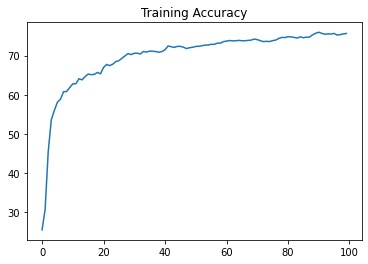

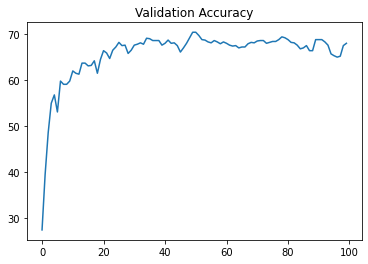

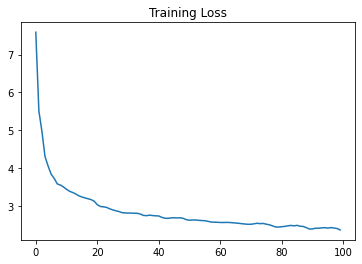

In [81]:
plt.plot(np.arange(0, 100, 1, dtype = int) , train_acc_adam)
plt.title('Training Accuracy')
plt.show()
print()
plt.plot(np.arange(0, 100, 1, dtype = int) , val_acc_adam)
plt.title('Validation Accuracy')
plt.show()
print()
plt.plot(np.arange(0, 100, 1, dtype = int) , loss_arr_train)
plt.title('Training Loss')
plt.show()
print()

####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?


``
Adam optimizer gives better results earlier than SGD. However, although Adam converges the result faster, SGD may give better results for longer training time-epochs. Adam is more preferable for my opinion since it gives higher accuracy results earlier than SGD which may help me to test my model's performance while changing the model parameters. After finishing this homework, I think that Adam is more preferable while optimizing the hyperparameters and model layers; however, if I will train a model for a long term use, I should use SGD to get better results. 
``

 

Mean Loss: 3.1049426 
Mean Acc: 0.7225 
Mean Macro Precision: 0.7266170849127219 
Mean Macro Recall: 0.7229894669825551 
Mean Macro F1 Score: 0.721497431372697


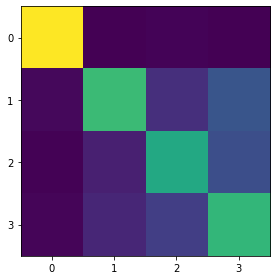

In [84]:
# Test CNN
# load best model
best_path = "drive/MyDrive/model_adam.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
testtbatch = 500
testtloader = DataLoader(X_test, testtbatch)

preds3 = np.zeros((2000, 4))
y_tests = np.zeros(2000)

with torch.no_grad():
#   iterate over test batches
    q = 0
    for (x, y) in testtloader:
            pred = model(x.float())
            y = y.type(torch.LongTensor)
            y_tests[testtbatch*q:testtbatch*(q+1)] = y.detach().numpy()
            preds3[testtbatch*q:testtbatch*(q+1)] = pred.detach().numpy()
            q += 1

#   get confusion matrix
preds3 = np.argmax(preds3, axis = 1)
conf = confusion_matrix(y_tests, preds3)
#   calculate accuracy
acc = accuracy_score(y_tests, preds3)
#   calculate precision
pre = precision_score(y_tests, preds3, average = 'macro')
#   calculate recall
rec = recall_score(y_tests, preds3, average = 'macro')
#   calculate F1 score
f1 = f1_score(y_tests, preds3, average = 'macro')

# print metrics
print("Mean Loss:", np.mean(loss_arr_val), "\nMean Acc:", acc, "\nMean Macro Precision:", pre, "\nMean Macro Recall:", rec, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()

###Transfer Learning [25 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [15 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model up to 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

In [ ]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 20
train_batch = 1750
test_batch = 250
learning_rate = 1e-2 # try learning rate from the interval [1e-1, 1e-4]

use_gpu = torch.cuda.is_available()


# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
trainloader = DataLoader(X_train, train_batch)
testloader = DataLoader(X_val, test_batch)

# initialize your network
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 4) #replace its output layer with a linear layer (in_features, proper number according to your output classes)

# define your loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 5e-04) # you can play with momentum and weight_decay parameters as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
gc.collect()
train_acc_pre = np.zeros(max_epoch)
val_acc_pre = np.zeros(max_epoch)
loss_arr_train_pre = []
loss_arr_val_pre = []

for epoch in range(max_epoch):
    print(epoch)
    preds = np.zeros((7000, 4))
    ys = np.zeros(7000)
    q = 0
    losses = 0
    losses2 = 0
    model=model.train()
    for (x, y) in trainloader:
        pred = model(x.float())
        y = y.type(torch.LongTensor)
        ys[train_batch*q:train_batch*(q+1)] = y.detach().numpy()
        loss = loss_fn(pred, y)
        preds[train_batch*q:train_batch*(q+1)] = pred.detach().numpy()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        q += 1
        losses += loss
    loss_arr_train_pre.append(losses)
    
#    Validation
    model = model.eval()
    with torch.no_grad():
        preds2 = np.zeros((1000, 4))
        y_vals = np.zeros(1000)
        q = 0
        for (x, y) in testloader:
            pred = model(x.float())
            y = y.type(torch.LongTensor)
            loss = loss_fn(pred, y)
            losses2 += loss
            y_vals[test_batch*q:test_batch*(q+1)] = y.detach().numpy()
            preds2[test_batch*q:test_batch*(q+1)] = pred.detach().numpy()
            q += 1
        loss_arr_val_pre.append(losses2)
        y1 = np.argmax(preds, axis = 1)
        y2 = np.argmax(preds2, axis = 1)
        train_acc_pre[epoch] = 100*accuracy_score(y1, ys)
        val_acc_pre[epoch] = 100*accuracy_score(y2, y_vals)
        print("%.2f"%train_acc_pre[epoch])
        print("%.2f"%val_acc_pre[epoch])
        print(losses/2)
    if epoch > 0 and max(val_acc_pre[:epoch]) < val_acc_pre[epoch]:
        torch.save(model, 'drive/MyDrive/model_pre.pth')


0
38.54
38.80
tensor(2.6844)
1


####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

In [ ]:
# Test CNN
# load best model
best_path = "drive/MyDrive/model_pre.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()
testtbatch = 1000
testtloader = DataLoader(X_test, testtbatch)

preds3 = np.zeros((2000, 4))
y_tests = np.zeros(2000)

with torch.no_grad():
#   iterate over test batches
    q = 0
    for (x, y) in testtloader:
            pred = model(x.float())
            y = y.type(torch.LongTensor)
            y_tests[testtbatch*q:testtbatch*(q+1)] = y.detach().numpy()
            preds3[testtbatch*q:testtbatch*(q+1)] = pred.detach().numpy()
            q += 1

#   get confusion matrix
preds3 = np.argmax(preds3, axis = 1)
conf = confusion_matrix(y_tests, preds3)
#   calculate accuracy
acc = accuracy_score(y_tests, preds3)
#   calculate precision
pre = precision_score(y_tests, preds3, average = 'macro')
#   calculate recall
rec = recall_score(y_tests, preds3, average = 'macro')
#   calculate F1 score
f1 = f1_score(y_tests, preds3, average = 'macro')

# print metrics
print("Mean Loss:", np.mean(loss_arr_val), "\nMean Acc:", acc, "\nMean Macro Precision:", pre, "\nMean Macro Recall:", rec, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf)
# We want to show all ticks...
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))

fig.tight_layout()
plt.show()